## Desafio 05 - EDA

# Importing Libs

In [2]:
# Libs for EDA evaluation

# Basic libs
import numpy as np 
import pandas as pd 

from pandas import set_option

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot') # nice plots

# Statistics
from scipy import stats
from scipy.stats import randint

# Measure variance
from sklearn.preprocessing import MinMaxScaler

# show all available columns
pd.set_option('display.max_columns', 500)
# show all available rows
pd.set_option('display.max_rows', 500)

# Avoiding error exhibitions
import warnings
warnings.filterwarnings('ignore')

# Charging data from .csv 

In [3]:
file = 'D:\DataScience\Python\Jupyter\Desafio05\Data\Raw\Default_Credit_Card.csv'
df_credit_card = pd.read_csv(file, delimiter=";")
df_credit_card.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Explaining Data

# Checking Data

In [4]:
# Verifying number of columns and lines 
print(f'The set of data has: {df_credit_card.shape[0]} lines and {df_credit_card.shape[1]} columns')

The set of data has: 30000 lines and 25 columns


In [5]:
# Verifying duplicated columns and lines
print(f'The data set has {df_credit_card.duplicated().sum()} duplicated lines')
print(f'The data set has {df_credit_card.T.duplicated().sum()} duplicated columns')

The data set has 0 duplicated lines
The data set has 0 duplicated columns


In [6]:
# Verifying Data set information
print(df_credit_card.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
# Verifying Data set missing values
print(f'Missing values treino:\n{df_credit_card.isna().sum()}')

Missing values treino:
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [8]:
# Verifying Data set statistics
set_option('display.width', 100)
set_option('precision', 2)

print("SUMMARY STATISTICS OF NUMERIC COLUMNS")
# removing ID and default payment next month (target)
print('\n', df_credit_card.drop( ['ID', 'default payment next month'], axis=1).describe().T) 

SUMMARY STATISTICS OF NUMERIC COLUMNS

              count       mean        std       min       25%       50%        75%       max
LIMIT_BAL  30000.0  167484.32  129747.66   10000.0  50000.00  140000.0  240000.00  1.00e+06
SEX        30000.0       1.60       0.49       1.0      1.00       2.0       2.00  2.00e+00
EDUCATION  30000.0       1.85       0.79       0.0      1.00       2.0       2.00  6.00e+00
MARRIAGE   30000.0       1.55       0.52       0.0      1.00       2.0       2.00  3.00e+00
AGE        30000.0      35.49       9.22      21.0     28.00      34.0      41.00  7.90e+01
PAY_0      30000.0      -0.02       1.12      -2.0     -1.00       0.0       0.00  8.00e+00
PAY_2      30000.0      -0.13       1.20      -2.0     -1.00       0.0       0.00  8.00e+00
PAY_3      30000.0      -0.17       1.20      -2.0     -1.00       0.0       0.00  8.00e+00
PAY_4      30000.0      -0.22       1.17      -2.0     -1.00       0.0       0.00  8.00e+00
PAY_5      30000.0      -0.27       1.13

In [9]:
# Verifying low variance for int and float fields
minmax = MinMaxScaler()

# numeric variables - removing target and ID
var_nums = df_credit_card.drop( ['ID', 'default payment next month'], axis=1).select_dtypes(include=['int64'])
variaveis_num_scaled = minmax.fit_transform(var_nums)
variaveis_num_scaled = pd.DataFrame(variaveis_num_scaled, columns=var_nums.columns)

In [10]:
# testing variance
listLowVariance = []
for col in variaveis_num_scaled.columns:
    if np.var(variaveis_num_scaled[col]) > 0.001:
        print(f'{col} possui variância considerável')
    else:
        print(f'{col} possui baixa variância')
        listLowVariance.append(col)

LIMIT_BAL possui variância considerável
SEX possui variância considerável
EDUCATION possui variância considerável
MARRIAGE possui variância considerável
AGE possui variância considerável
PAY_0 possui variância considerável
PAY_2 possui variância considerável
PAY_3 possui variância considerável
PAY_4 possui variância considerável
PAY_5 possui variância considerável
PAY_6 possui variância considerável
BILL_AMT1 possui variância considerável
BILL_AMT2 possui variância considerável
BILL_AMT3 possui variância considerável
BILL_AMT4 possui variância considerável
BILL_AMT5 possui variância considerável
BILL_AMT6 possui variância considerável
PAY_AMT1 possui baixa variância
PAY_AMT2 possui baixa variância
PAY_AMT3 possui baixa variância
PAY_AMT4 possui baixa variância
PAY_AMT5 possui variância considerável
PAY_AMT6 possui variância considerável


>> Conclusions and actions:

    The data has already cleaned, according to the description
    There aren't duplicated lines and columns, besides missing values

    Categorical variables must be treated - education and marriage
       Education has 0 and 5, 6 that can be 4
       Marriage has 0 that can be 3

    The average value for the credit card limit is 167,484.32 NT dollars. The standard deviation is 129,747.66 NT dollars.
    Education level is mostly graduate school (1) and university (2). Most of the clients are either marrined or single. 
    Average age is 35.49 years, with a standard deviation of 9.22 years.
    
    It is necessary to pay attention in low variance presented in Pay_Amt 1, 2, 3, 4 

# Feature Engineering

In [11]:
# Renanimg the target column
df_credit_card.rename(columns={"default payment next month": "Default"}, inplace=True)
# Defining the target constant
TARGET = 'Default'

In [12]:
# Dropping the ID column 
df_credit_card.drop('ID', axis = 1, inplace =True) # drop column "ID"

In [13]:
# treating education

In [14]:
df_credit_card['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [15]:
# 0, 5 and 6 will be treated as 4, it means others
df_credit_card['EDUCATION'].loc[df_credit_card['EDUCATION'] == 0] = 4 
df_credit_card['EDUCATION'].loc[df_credit_card['EDUCATION'] == 5] = 4 
df_credit_card['EDUCATION'].loc[df_credit_card['EDUCATION'] == 6] = 4 

In [16]:
df_credit_card['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

In [17]:
# treating Marriage

In [18]:
df_credit_card['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [19]:
# 0 will be treated as 3, it means others
df_credit_card['MARRIAGE']=np.where(df_credit_card['MARRIAGE'] == 0, 3, df_credit_card['MARRIAGE'])
df_credit_card['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

# saving .csv data treated

In [20]:
df_credit_card.sample(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
10885,50000,1,3,1,47,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
4475,240000,2,1,1,44,0,0,0,0,0,0,188307,179988,184976,188934,196884,199267,6600,8000,7000,11000,7181,7236,0
12748,30000,2,2,2,23,0,0,0,0,0,0,28420,27929,28920,27997,28378,29321,1482,1703,1001,1500,1845,1001,1
3188,430000,2,1,2,39,-2,-1,-1,-1,-1,-1,673,4549,7566,987,4870,975,4576,7642,990,4889,981,317,0
22696,80000,2,2,2,36,-2,-2,-2,-2,-2,-2,3966,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_credit_card.to_csv('D:\DataScience\Python\Jupyter\Desafio05\Data\Cleaned\Default_Credit_Card_toModel.csv', index=False)

# Exploratory Data Analysis (EDA)

In [21]:
# Default vs non-Default
yes = df_credit_card.Default.sum()
no = len(df_credit_card)-yes

# Percentage
yes_perc = round(yes/len(df_credit_card)*100, 1)
no_perc = round(no/len(df_credit_card)*100, 1)

print(f'Number of Default Clients: {yes}')
print(f'Number of non-Default Clients: {no}')
print(36*'-')
print(f'Ratio of Default Clients: {yes_perc} %')
print(f'Ratio of non-Default Clients: {no_perc} %')

Number of Default Clients: 6636
Number of non-Default Clients: 23364
------------------------------------
Ratio of Default Clients: 22.1 %
Ratio of non-Default Clients: 77.9 %


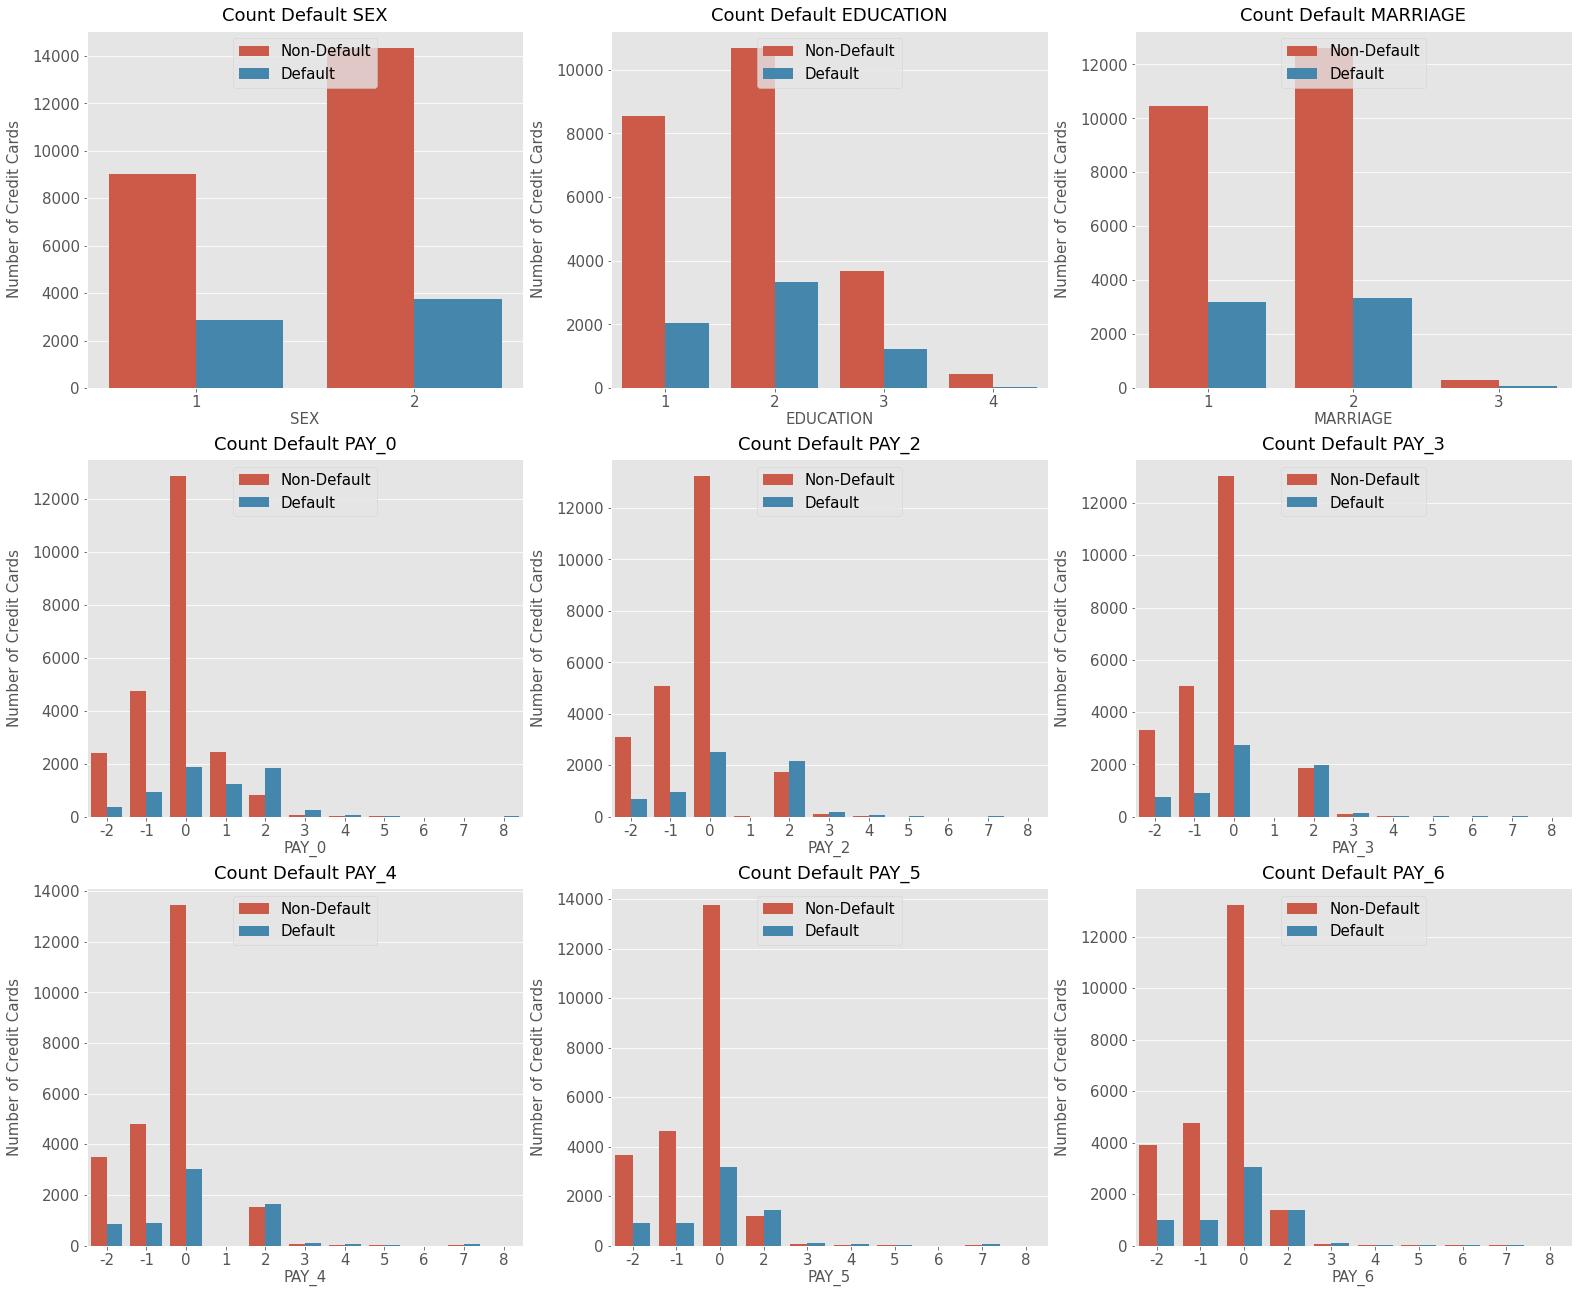

In [22]:
# Analysing categorical variables

category_vars = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 15))
plt.subplots_adjust(right=1.5, top=1.25)

for i, field in enumerate(category_vars, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=field, hue='Default', data=df_credit_card)
    
    plt.xlabel('{}'.format(field), size=15, labelpad=2)
    plt.ylabel('Number of Credit Cards', size=15, labelpad=10)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(['Non-Default', 'Default'], loc='upper center', prop={'size': 15})
    plt.title('Count Default {}'.format(field), size=18, y=1.01)


plt.show()

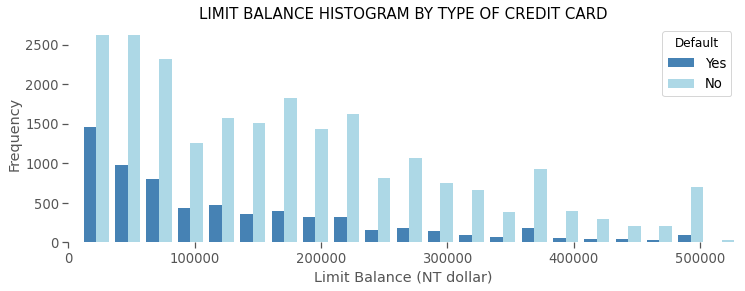

In [23]:
# Analysing the Limit Credit Balance
# Besides the greater number of credit cards the lower limit bal having more default. 
# The limit bals from 100k to 200k have praticaly the same level of default 

x1 = list(df_credit_card[df_credit_card['Default'] == 1]['LIMIT_BAL'])
x2 = list(df_credit_card[df_credit_card['Default'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
plt.hist([x1, x2], bins = 40, color=['steelblue', 'lightblue'])
plt.xlim([0,530000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', SIZE=15)
plt.box(False)
plt.show()

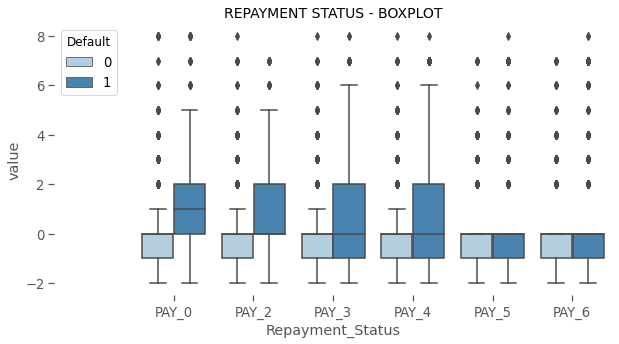

In [52]:
# Repayments comparison
# Repayment PAY_0 and PAY_2 seem to have more discrepancy defaults
# Repayment PAY_5 and PAY_6 having same level of default and non-default

Repayment = df_credit_card[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

Repayment = pd.concat([df_credit_card['Default'], Repayment], axis=1)
Repayment = pd.melt(Repayment,id_vars="Default",
                    var_name="Repayment_Status",
                    value_name='value')

plt.figure(figsize=(10,5))
sns.set_context('notebook', font_scale=1.2)
sns.boxplot(y="value", x="Repayment_Status", hue="Default", data=Repayment, palette='Blues')
plt.legend(loc='best', title= 'Default', facecolor='white')
plt.xlim([-1.5,5.5])
plt.title('REPAYMENT STATUS - BOXPLOT', size=14)
plt.box(False)
plt.show()

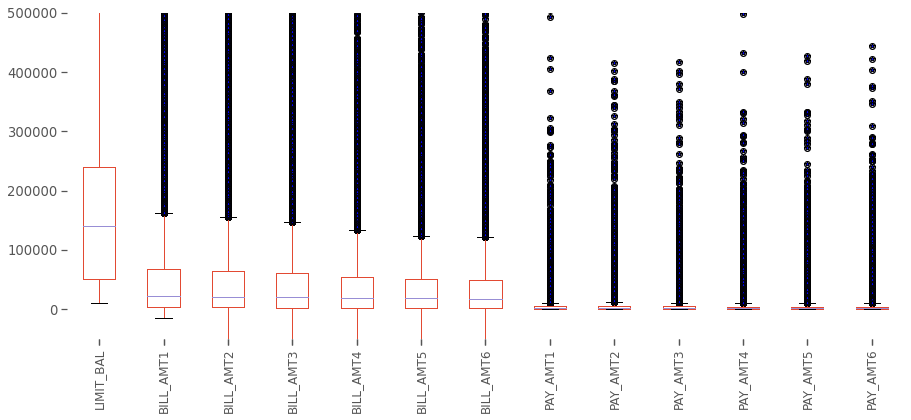

In [26]:
# variables that represent monetary values are distributed over a wide range, 
# appearing to have an unequal distribution their values
# besides, outliers and high variance

num_vars = ['LIMIT_BAL', 
            'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' ]

plt.figure(figsize=(15,6))
ax= df_credit_card.drop('Default', axis=1).boxplot(num_vars, rot=90)
outliers = dict(markerfacecolor='b', marker='*')
ax= df_credit_card.boxplot(num_vars, rot=90, flierprops=outliers)
plt.xticks(size=12)
ax.set_ylim([-50000,500000])
plt.box(False)
plt.show()

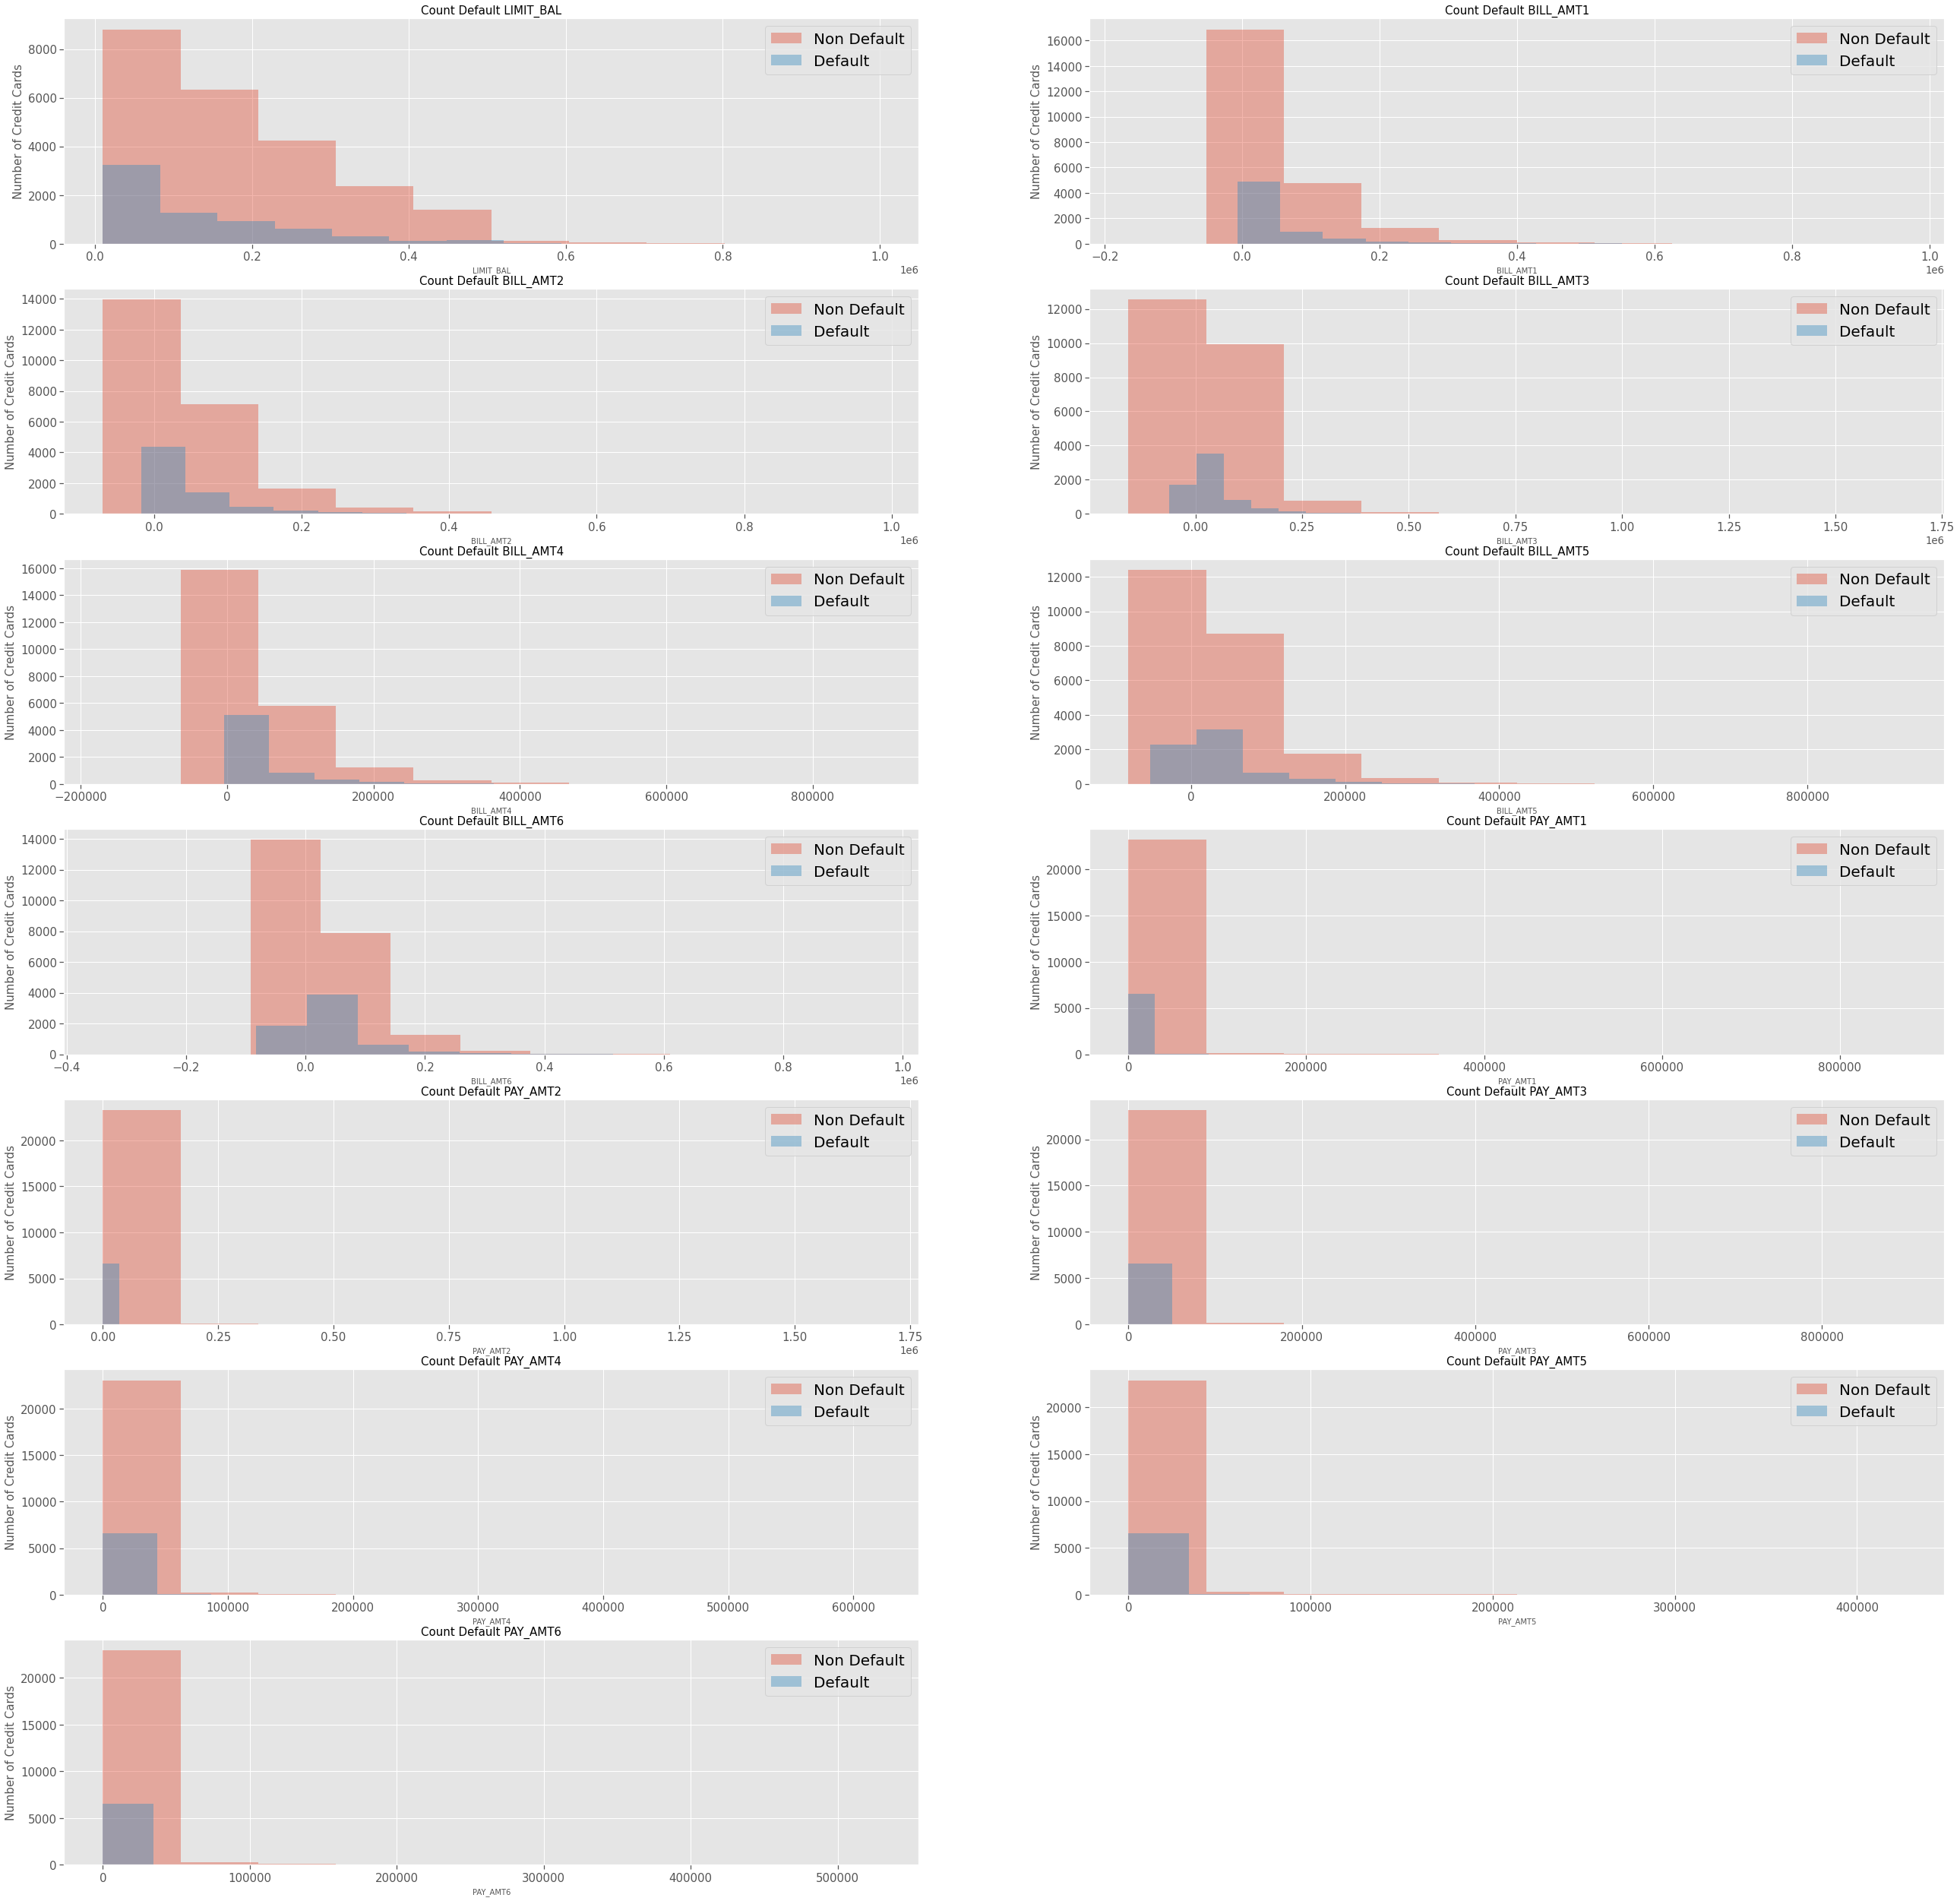

In [41]:
# analysing numeric variables vs Target - distinct variance of values 
# Smaller credit balance greater default risk
# Smaller debts have greater default risk, although these are not real in Bill 03, 06 and 06  

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(25, 30))
plt.subplots_adjust(right=1.5, top=1.25)

for i, field in enumerate(num_vars, 1):    
    plt.subplot(7, 2, i)
    
    df_filter = df_credit_card.loc[df_credit_card['Default']==0]
    sns.distplot(df_filter[field],bins=10,kde=False,hist=True)

    df_filter = df_credit_card.loc[df_credit_card['Default']==1]
    sns.distplot(df_filter[field],bins=10,kde=False,hist=True)
    
    plt.xlabel('{}'.format(field), size=10, labelpad=5)
    plt.ylabel('Number of Credit Cards', size=15, labelpad=5)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(['Non Default', 'Default'], loc='upper right', prop={'size': 20})
    plt.title('Count Default {}'.format(field), size=15, y=1)

plt.show()

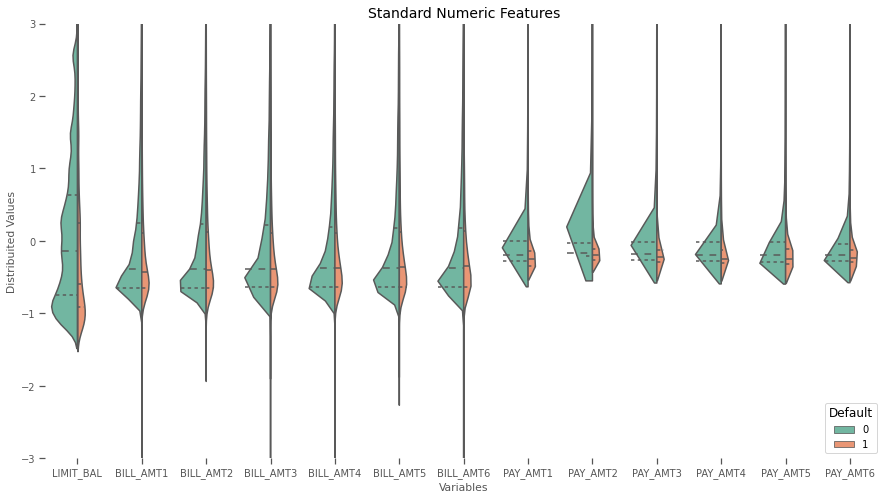

In [95]:
# analysing numeric variables in a standard distribuition   
stdX = (df_credit_card[num_vars] - df_credit_card[num_vars].mean()) / (df_credit_card[num_vars].std())  # standardization values
data_st = pd.concat([df_credit_card['Default'],stdX.iloc[:,:]],axis=1)
data_st = pd.melt(data_st,id_vars="Default",
                    var_name="Variables",
                    value_name='Distribuited Values')
plt.figure(figsize=(15,8))
sns.set_context('notebook', font_scale=0.9)
sns.violinplot(y="Distribuited Values", x="Variables", hue="Default", data=data_st, split=True, 
               inner="quartile", palette='Set2', scale='count')
plt.legend(loc=4, title= 'Default', facecolor='white')
plt.ylim([-3,3])
plt.title('Standard Numeric Features', size=14)
plt.box(False)
plt.show()

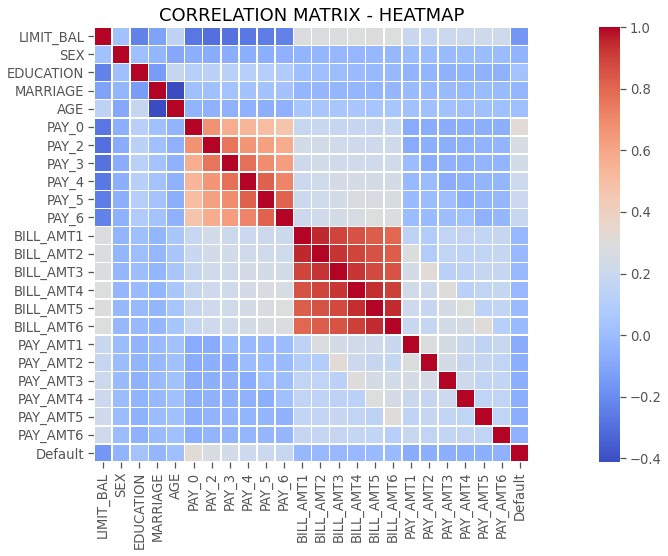

In [42]:
# Correlation

# Collinearity amongst Pay and Bill variables, it would indicate better performance in low correlated variables for model 
# running

corr = df_credit_card.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(25, 8))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

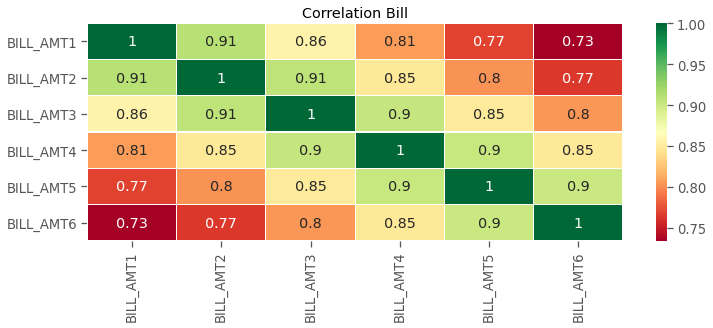

In [59]:
# Different from heatmap above, it was measured here the spearman values, levagering irregular distribution
# High correlation amongst Bill variables
Bills = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6' ]

sns.heatmap(df_credit_card[Bills].corr(method = 'spearman'),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,4)
plt.title('Correlation Bill')
plt.show()

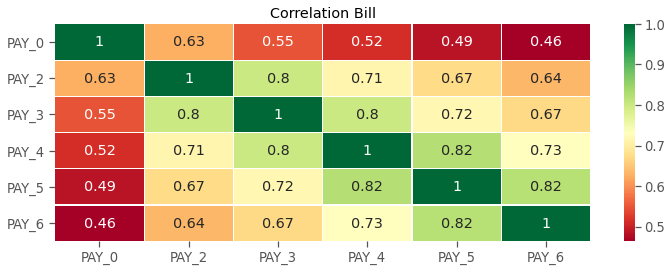

In [63]:
# Different from heatmap above, it was measured here the spearman values, levagering irregular distribution
# High correlation amongst Boolean Pay variables, but it is better than Bill 

sns.heatmap(df_credit_card[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].corr(method = 'spearman'),
            annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,4)
plt.title('Correlation Bill')
plt.show()

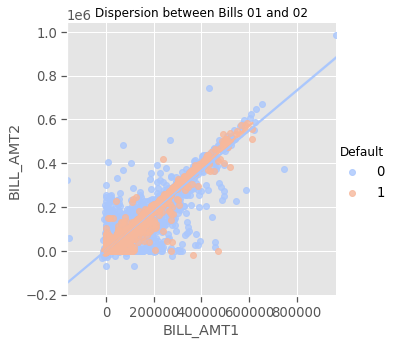

In [79]:
# Uncorrelated data are poentially more useful
# Practically there are same curve in default and non-default, analysing linear regression

sns.lmplot(x='BILL_AMT1', y= 'BILL_AMT2', data = df_credit_card, hue ='Default', 
           palette='coolwarm')
plt.title('Dispersion between Bills 01 and 02', size=12);


Text(0.5, 1.0, 'Dispersion distinguishing between Default and Non-default for PAY 0 and 2')

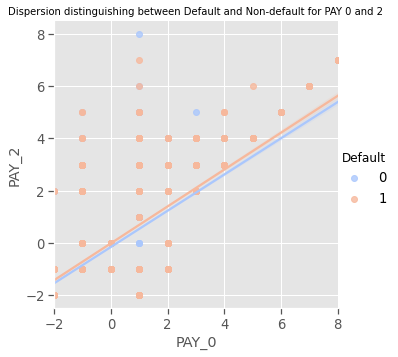

In [82]:
sns.lmplot(x='PAY_0', y= 'PAY_2', data = df_credit_card, hue ='Default', 
           palette='coolwarm')
plt.title('Dispersion distinguishing between Default and Non-default for PAY 0 and 2', size=10)